In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import cv2
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

In [3]:
train_path = 'new_devnagari/train'
valid_path = 'new_devnagari/val'
test_path = 'new_devnagari/test'

In [4]:
folders = glob.glob('new_devnagari/train/*')
len(folders)

58

In [5]:
from keras.applications.vgg16 import preprocess_input

# Define image dimensions
IMAGE_SIZE = (56, 56)  # Experiment with different sizes

# Data generators with preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    preprocessing_function=preprocess_input
)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    color_mode='rgb',  # or 'grayscale'
    class_mode='categorical'
)
valid_set = valid_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    color_mode='rgb',  # or 'grayscale'
    class_mode='categorical'
)
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    color_mode='rgb',  # or 'grayscale'
    class_mode='categorical',
    shuffle=False
)


Found 9006 images belonging to 58 classes.
Found 2574 images belonging to 58 classes.
Found 1332 images belonging to 58 classes.


In [5]:
len(train_set)

282

In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(56, 56, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(folders), activation='softmax')  # Change the output layer activation according to the number of classes
])

C:\Users\basne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 56, 56, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 58)                  │          14,906 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,532,794 (13.48 MB)

 Trainable params: 3,532,794 (13.48 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
#  model.load_weights('/content/drive/MyDrive/Colab Notebooks/lfw_original/lfw/models/lfw_.h5')

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

filepath = 'model_full.keras'
mc = ModelCheckpoint(filepath,
                     monitor='val_accuracy', 
                     mode='max',
                     save_best_only=True)
log_csv  = CSVLogger('model_full.csv', separator=',', append = False)

In [10]:
r = model.fit(train_set,
         validation_data=valid_set,
         epochs=20,
         callbacks=[es]
         )

Epoch 1/20


C:\Users\basne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


282/282 ━━━━━━━━━━━━━━━━━━━━ 156s 536ms/step - accuracy: 0.1608 - loss: 3.4054 - val_accuracy: 0.5035 - val_loss: 1.8932
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 155s 547ms/step - accuracy: 0.6237 - loss: 1.3251 - val_accuracy: 0.6915 - val_loss: 1.0545
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 164s 579ms/step - accuracy: 0.7486 - loss: 0.8345 - val_accuracy: 0.6601 - val_loss: 1.2012
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 169s 596ms/step - accuracy: 0.8132 - loss: 0.6304 - val_accuracy: 0.8349 - val_loss: 0.5467
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 177s 626ms/step - accuracy: 0.8388 - loss: 0.5223 - val_accuracy: 0.7809 - val_loss: 0.7548
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 180s 636ms/step - accuracy: 0.8683 - loss: 0.4208 - val_accuracy: 0.7152 - val_loss: 1.1445
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 183s 647ms/step - accuracy: 0.8783 - loss: 0.3975 - val_accuracy: 0.8143 - val_loss: 0.6464
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 188s 663ms/step - accuracy: 0.8924 - loss: 0.34

In [11]:
model.save('model.keras')

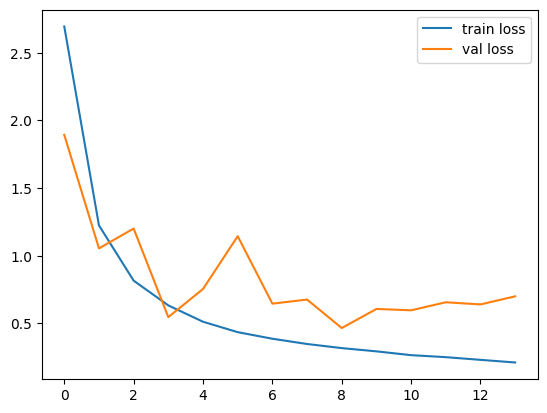

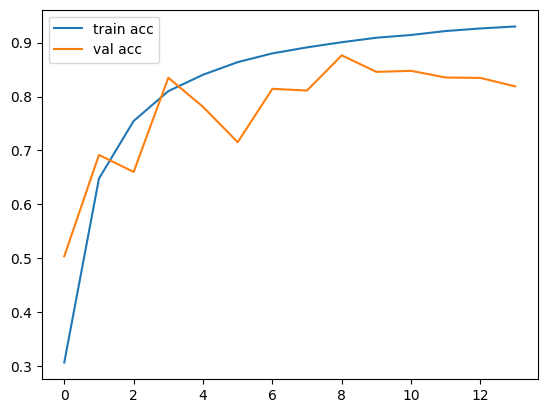

In [12]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [6]:
# Load the trained model
trained_model = load_model('model.keras')

# Evaluate the model on the test set to get the test accuracy
test_loss, test_accuracy = trained_model.evaluate(test_set)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test data
predictions = trained_model.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_set.classes

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)


C:\Users\basne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9220 - loss: 0.2822
Test Accuracy: 0.8941441178321838
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.97      0.98        30
           2       0.89      0.80      0.84        30
           3       0.68      0.90      0.77        30
           4       1.00      0.97      0.98        30
           5       1.00      0.97      0.98        30
           6       0.94      0.97      0.95        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       0.94      1.00      0.97        30
          10       0.77      0.87      0.82        23
          11       0.86      0.83      0.84        23
          12       0.95      0.87      0.91        23
          13       0.96      1.00      0.98        23
          14    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


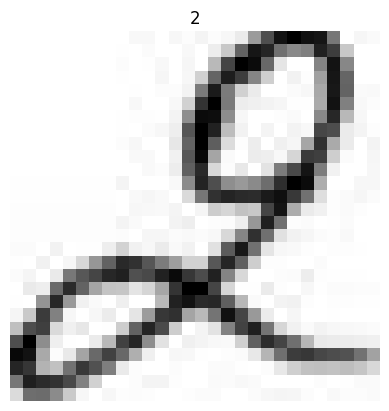

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


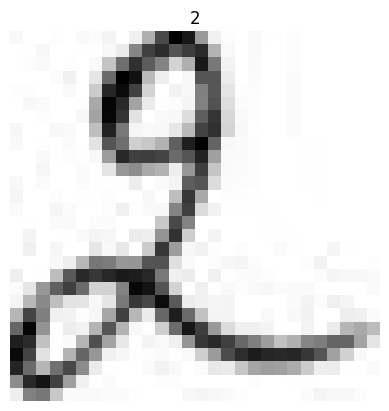

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


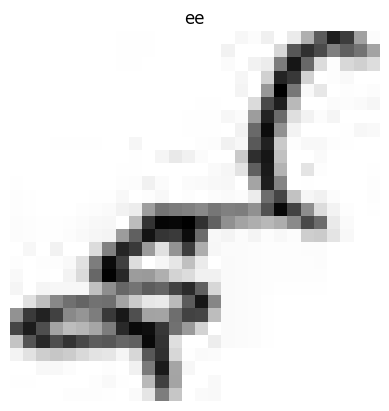

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


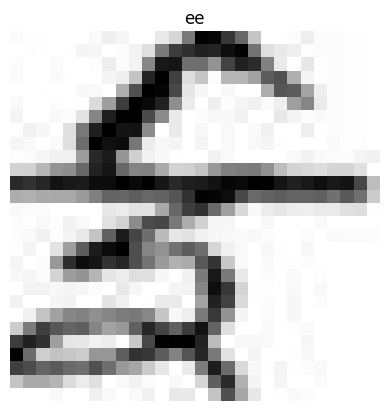

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


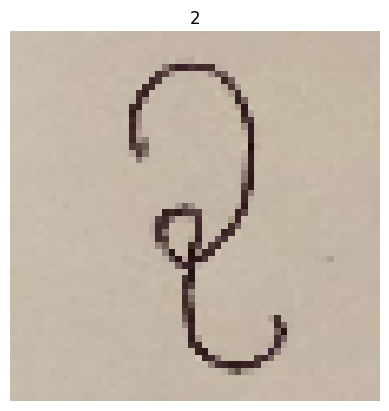

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


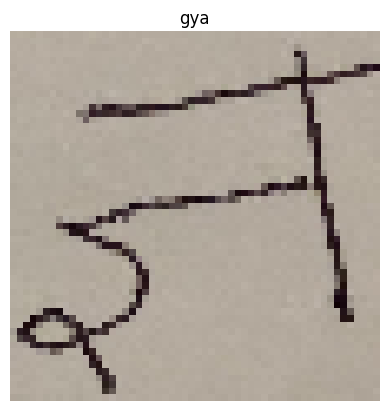

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


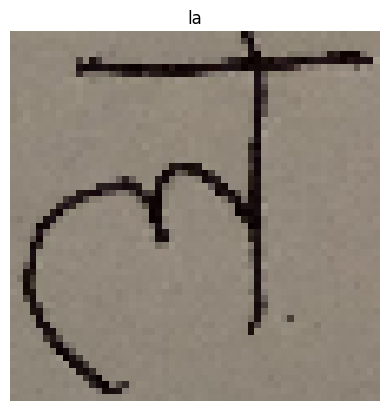

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


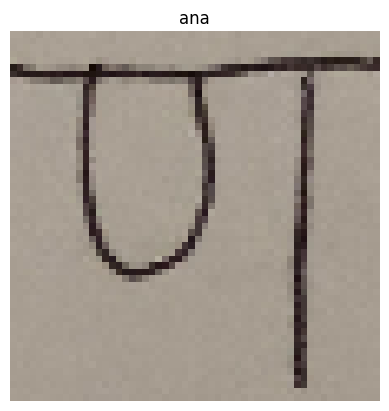

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


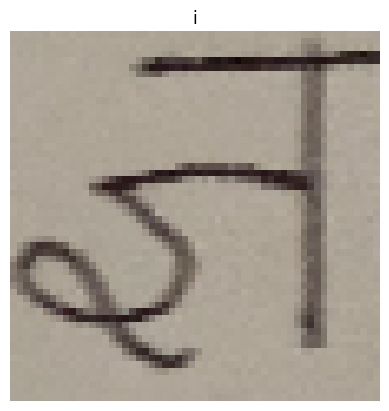

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


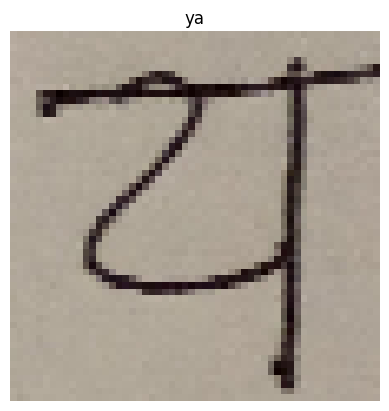

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


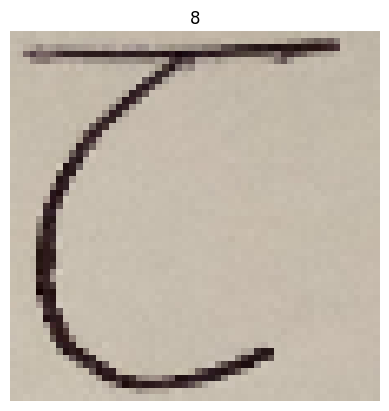

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


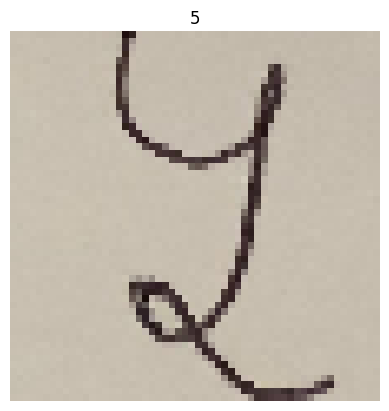

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


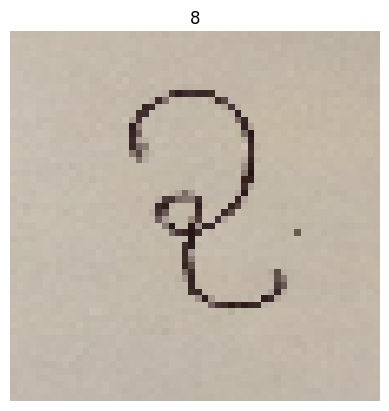

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


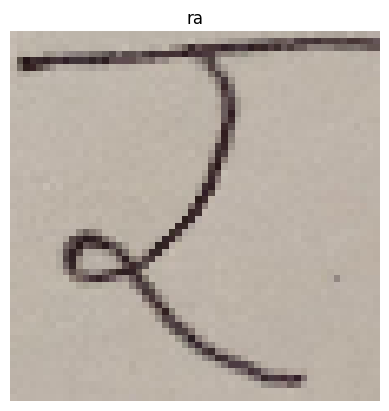

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


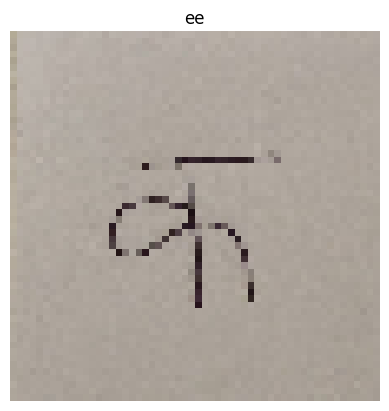

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


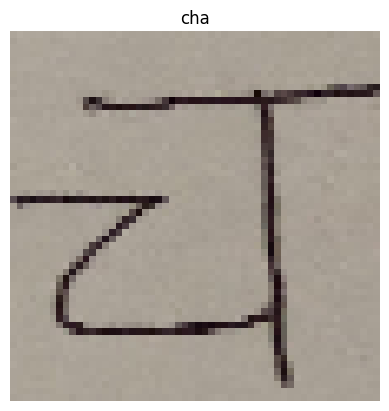

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


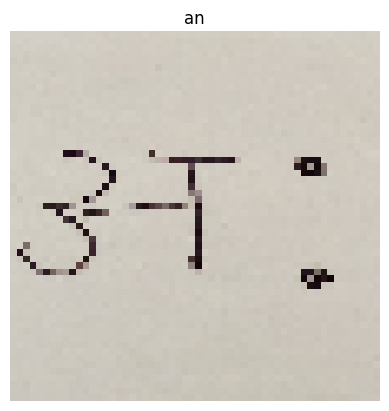

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


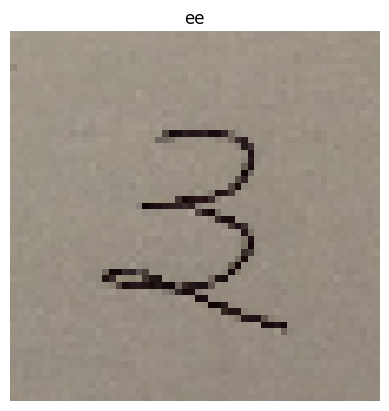

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


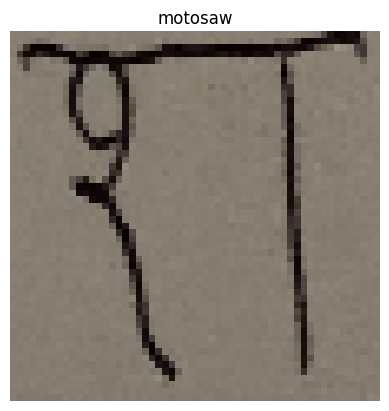

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


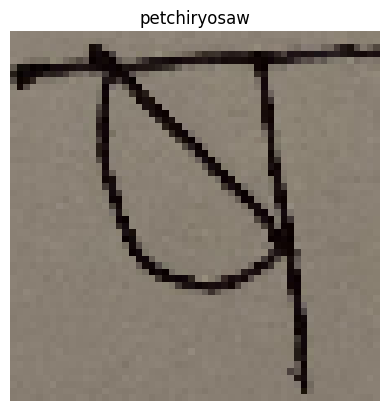

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


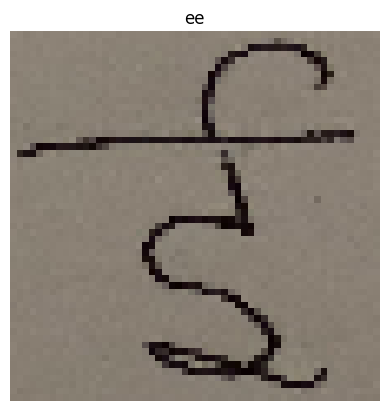

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


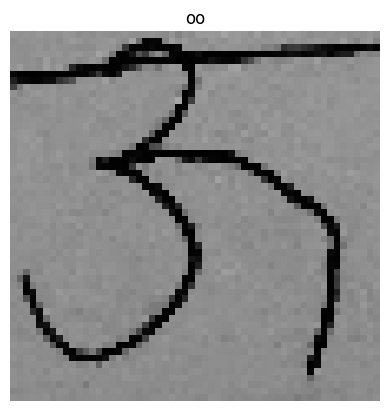

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


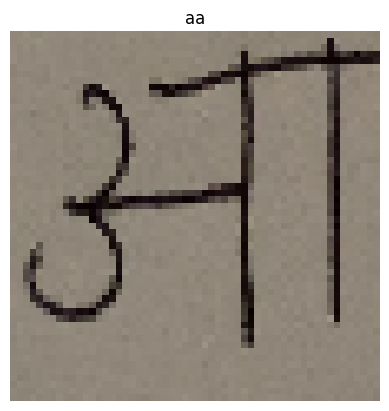

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


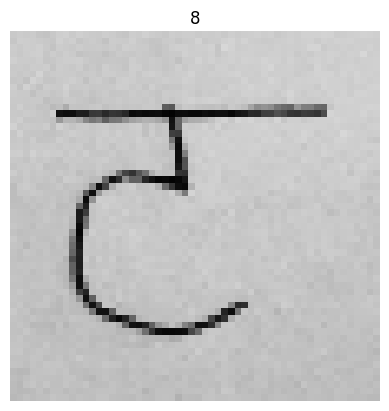

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


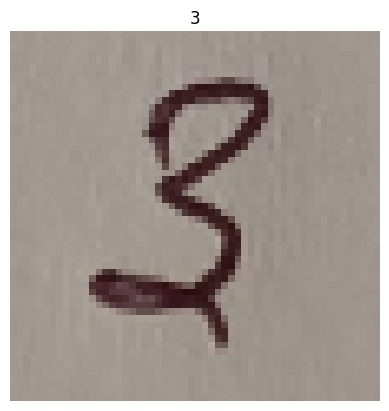

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


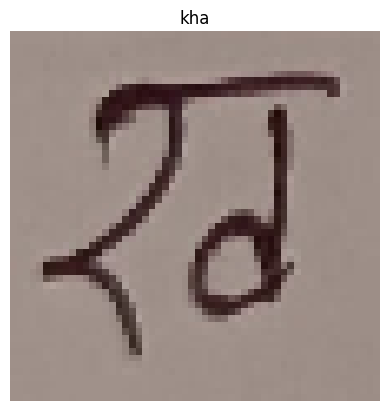

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


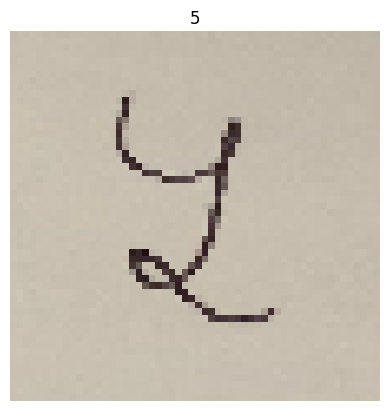

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


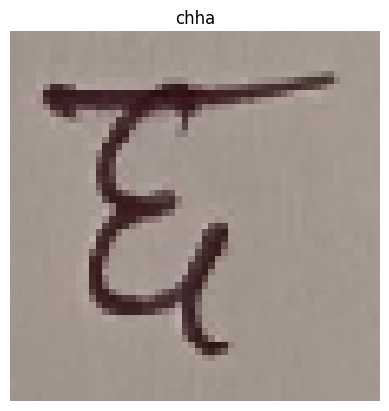

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


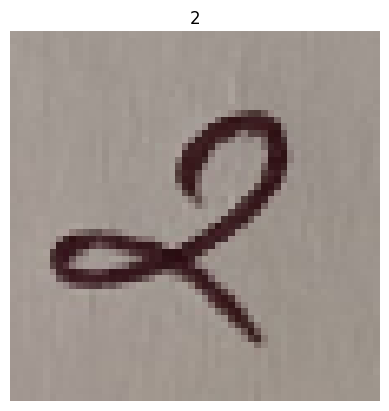

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


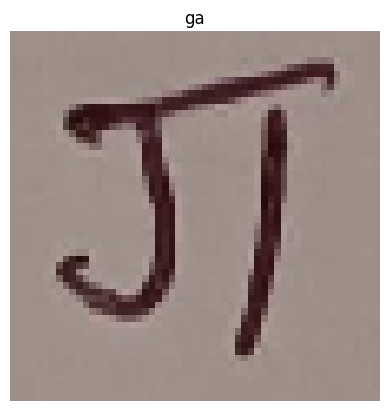

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


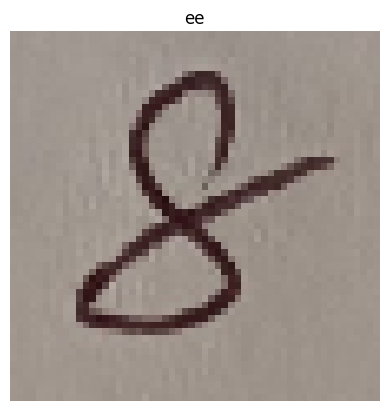

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


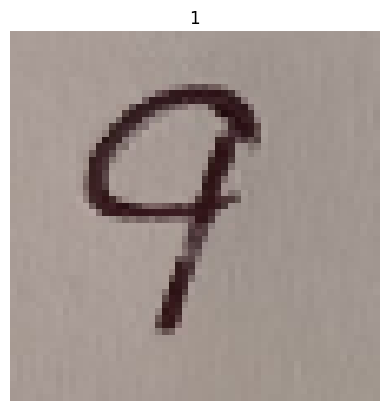

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


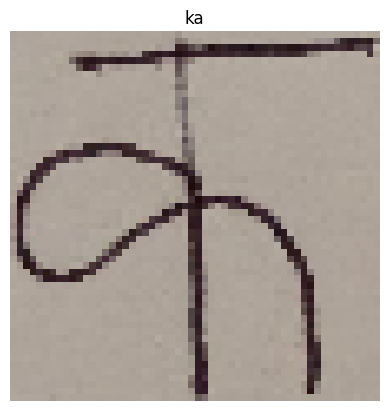

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


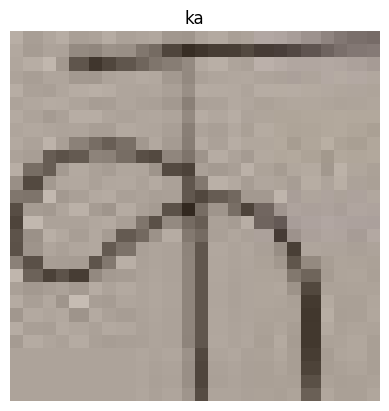

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


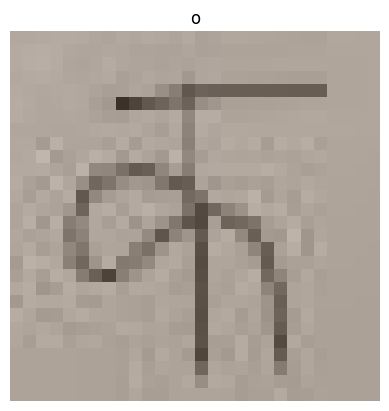

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


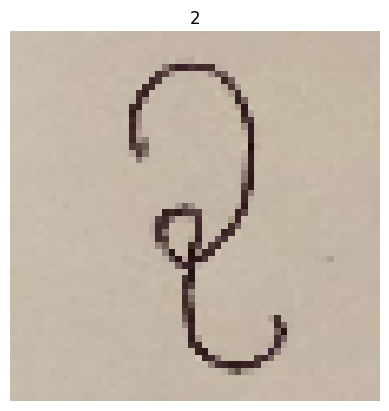

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


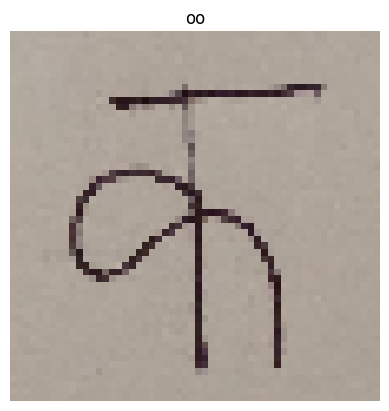

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


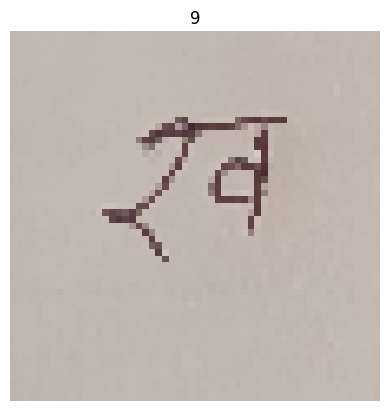

In [18]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'aa', 'ae', 'ah', 'ai', 'an', 'ana', 'au', 'ba', 'bha',
        'cha', 'chha', 'da', 'daa', 'dha', 'dhaa', 'ee', 'ga', 'gha', 'gya', 'ha', 'i', 'ja', 'jha', 'ka', 'kha', 'kna',
        'ksha', 'la', 'ma', 'motosaw', 'na', 'o', 'oo', 'pa', 'patalosaw', 'petchiryosaw', 'pha', 'ra', 'ta', 'taa', 'tha',
        'thaa', 'tra', 'u', 'va', 'ya', 'yna']

# Path to the folder containing images
folder_path = r'uploaded_files'

# Get list of all image files in the folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Load the trained model
trained_model = load_model('model.keras')

#change this according to your preprocessing
# Iterate over each image file
for image_path in image_files:
    # Load the image
    img = load_img(image_path, target_size=(56, 56))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Rescale pixel values to [0, 1]
    
    # Make predictions
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions[0])

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Display the predicted class label
    plt.title(labels[predicted_label])

    output_file_path = os.path.splitext(image_path)[0] + '_predicted.png'
    plt.savefig(output_file_path)
    
    plt.show()


In [12]:
output_file_path = os.path.splitext(image_path)[0] + '_predicted.png'
plt.savefig(output_file_path)

<Figure size 640x480 with 0 Axes>

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(folders), activation='softmax')  # Change the output layer activation according to the number of classes
])

# Compile the model with Adam optimizer and a specific learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with data augmentation and callbacks
history = model.fit(train_set,
                    epochs=20,
                    validation_data=valid_set,
                    callbacks=[early_stopping])


C:\Users\basne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20


C:\Users\basne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


282/282 ━━━━━━━━━━━━━━━━━━━━ 164s 562ms/step - accuracy: 0.0539 - loss: 3.9173 - val_accuracy: 0.3434 - val_loss: 2.5462
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 178s 631ms/step - accuracy: 0.3597 - loss: 2.3697 - val_accuracy: 0.6655 - val_loss: 1.1585
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 184s 650ms/step - accuracy: 0.5633 - loss: 1.5293 - val_accuracy: 0.7848 - val_loss: 0.7397
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 189s 666ms/step - accuracy: 0.6667 - loss: 1.1459 - val_accuracy: 0.7630 - val_loss: 0.7889
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 187s 659ms/step - accuracy: 0.7287 - loss: 0.9082 - val_accuracy: 0.7708 - val_loss: 0.8038
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.7544 - loss: 0.7968 - val_accuracy: 0.8271 - val_loss: 0.5768
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.7934 - loss: 0.6642 - val_accuracy: 0.8613 - val_loss: 0.4642
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 232s 821ms/step - accuracy: 0.8088 - loss: 0.6170 - v

In [19]:
model.save('model_better.keras')

In [15]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0